In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split as tts

In [23]:
df = pd.read_csv("/content/sample_data/car data.csv")

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [27]:
df["Present_Price"].describe()

count    301.000000
mean       7.628472
std        8.642584
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

<Axes: ylabel='Frequency'>

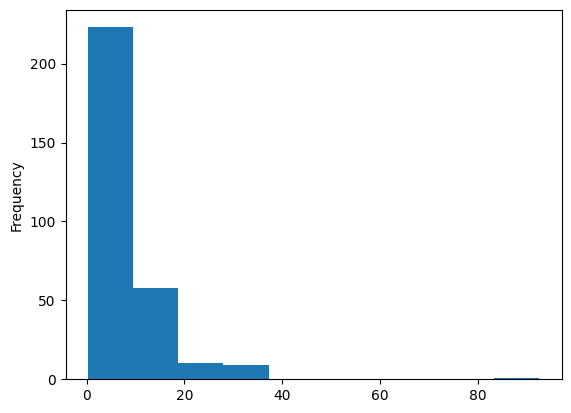

In [28]:
df["Present_Price"].plot.hist()

<Axes: ylabel='Present_Price'>

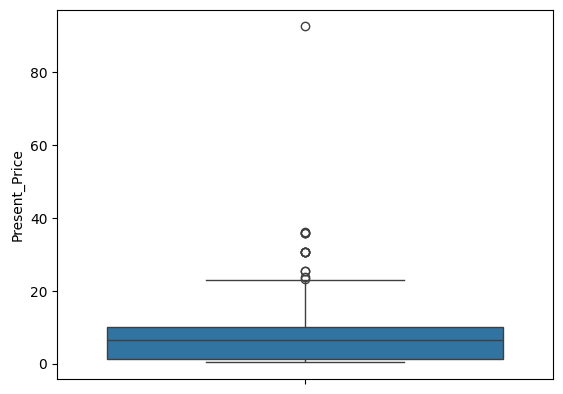

In [30]:
sns.boxplot(df["Present_Price"])

In [32]:
q1 = df["Present_Price"].quantile(0.25)
q2 = df["Present_Price"].quantile(0.75)
IQR = q2 - q1
IQR

8.700000000000001

In [34]:
upper_limit = q2 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
upper_limit, lower_limit

(22.950000000000003, -11.850000000000001)

In [35]:
def imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value < lower_limit:
    return lower_limit
  else:
    return value

In [36]:
df["Present_Price"] = df["Present_Price"].apply(imputer)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [38]:
x = df.drop(columns=["Present_Price"])
y = df["Present_Price"]

In [39]:
categorical = x.select_dtypes(include=["object"])

In [40]:
dup = pd.get_dummies(categorical, drop_first=True)
x = x.drop(list(categorical.columns), axis=1)
x = pd.concat([x,dup], axis=1)

In [46]:
x_train, x_test, y_train, y_test = tts(x,y,random_state=42)

In [47]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [48]:
model.score(x_test, predictions)

1.0